In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

C:\Users\arnim\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\arnim\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
IMG_SIZE = (128, 128)
input_shape = IMG_SIZE + (3,)

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.1
)

train_generator = train_datagen.flow_from_directory(
    'cropped',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'cropped',
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 5143 images belonging to 4 classes.
Found 569 images belonging to 4 classes.


In [10]:
model = Sequential()
model.add(Conv2D(64, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(128, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 55, 55, 64)        23296     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 27, 27, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 27, 27, 128)       204928    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 13, 13, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 256)       295168    
                                                                 
 flatten_2 (Flatten)         (None, 43264)            

Found 5143 images belonging to 4 classes.
Found 569 images belonging to 4 classes.
Epoch 1/30
160/160 [==============================] - 29s 175ms/step - loss: 1.0875 - accuracy: 0.5124 - val_loss: 0.9637 - val_accuracy: 0.6140
Epoch 2/30
160/160 [==============================] - 26s 161ms/step - loss: 0.8170 - accuracy: 0.6693 - val_loss: 0.8169 - val_accuracy: 0.6783
Epoch 3/30
160/160 [==============================] - 26s 162ms/step - loss: 0.7069 - accuracy: 0.7259 - val_loss: 0.9610 - val_accuracy: 0.5790
Epoch 4/30
160/160 [==============================] - 26s 161ms/step - loss: 0.6515 - accuracy: 0.7488 - val_loss: 0.6836 - val_accuracy: 0.7298
Epoch 5/30
160/160 [==============================] - 26s 161ms/step - loss: 0.5427 - accuracy: 0.7905 - val_loss: 0.7447 - val_accuracy: 0.7188
Epoch 6/30
160/160 [==============================] - 26s 160ms/step - loss: 0.5002 - accuracy: 0.8083 - val_loss: 0.6176 - val_accuracy: 0.7684
Epoch 7/30
160/160 [===========================

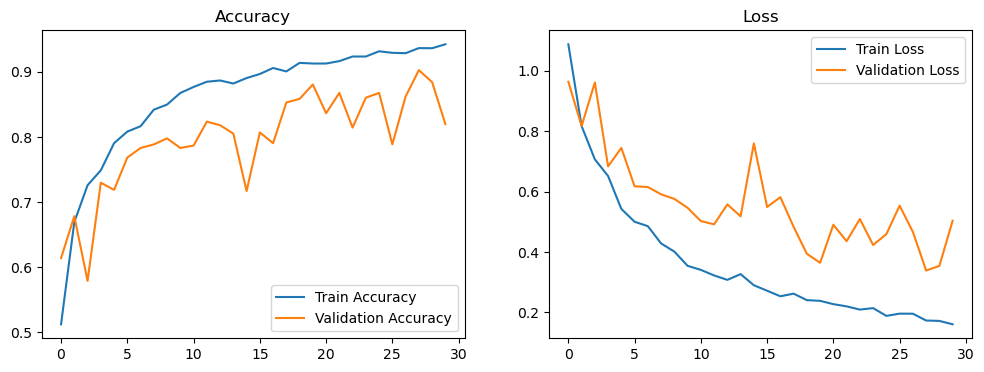

In [2]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=validation_generator.samples // 32
)
loss, accuracy = model.evaluate(validation_generator)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [4]:
# Save the model
model.save('brain_tumor_alexnet.h5')

C:\Users\arnim\anaconda3\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

IMG_SIZE = (227, 227)
input_shape = IMG_SIZE + (3,)
model = Sequential()
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))
adam = Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 384)       885120    
                                                                 
 conv2d_6 (Conv2D)           (None, 13, 13, 384)      

In [13]:
model = Sequential()
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(256, (5, 5), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(384, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))


In [14]:
adam = Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])
